# Cylindrical 
plot2d only work for meep version > 1.24.0

In [1]:
import meep as mp
print(mp.__version__)

1.16.1


In [94]:
## import my colormap
import mycmapls as ms
mycmap = ms.mycmap
mycmap1 = ms.mycmap1
mycmap2 = ms.mycmap2

-----------
Initializing structure...
time for choose_chunkdivision = 0.00202489 s
Working in Cylindrical dimensions.
Computational cell is 2.88 x 0 x 4 with resolution 100
     block, center = (0.44,0,0)
          size (0.88,1e+20,0.15)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.76,5.76,5.76)
time for set_epsilon = 0.287657 s
-----------
Meep: using complex fields.
Meep progress: 2.765/13.071895424836601 = 21.2% done in 4.0s, 14.9s to go
on time step 553 (time=2.765), 0.00723974 s/step
Meep progress: 5.5200000000000005/13.071895424836601 = 42.2% done in 8.0s, 11.0s to go
on time step 1104 (time=5.52), 0.00726478 s/step
Meep progress: 8.15/13.071895424836601 = 62.3% done in 12.0s, 7.3s to go
on time step 1631 (time=8.155), 0.00760507 s/step
Meep progress: 10.88/13.071895424836601 = 83.2% done in 16.0s, 3.2s to go
on time step 2177 (time=10.885), 0.00732983 s/step
run 0 finished at t = 13.075000000000001 (2615 timesteps)


     block, center = (0.44,0,0)
          size (0.88,1e+20,0.15)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.76,5.76,5.76)


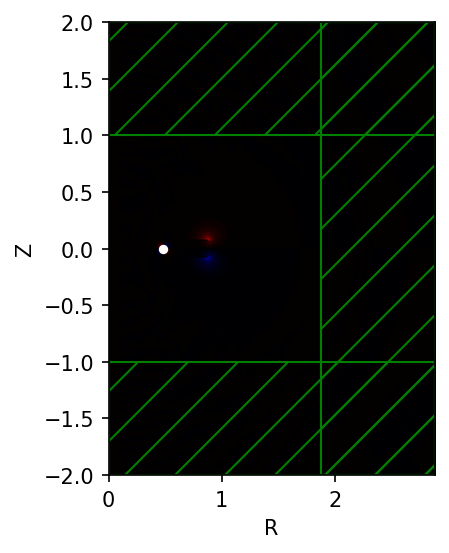

In [99]:

import argparse
from matplotlib import pyplot as plt
from meep import verbosity
import numpy as np

verbosity(1)

n = 2.4     # index of waveguide
w = 0.88       # width of waveguide
r = 0       # inner radius of ring
pad = 1     # padding between waveguide and edge of PML
dpml = 1    # thickness of PML

sr = r + w + pad + dpml  # radial size (cell is from 0 to sr)
sz =4
dimensions = mp.CYLINDRICAL
cell = mp.Vector3(sr, 0, sz)
m = 13

geometry = [mp.Block(center=mp.Vector3(r + (w / 2),0,0),
                        size=mp.Vector3(w, mp.inf,0.15),
                        material=mp.Medium(index=n))]
pml_layers = [mp.PML(dpml)]
#pml_layers = [mp.PML(dpml,direction=mp.R)]

resolution = 100

fcen = 1.53  # pulse center frequency
df = 0.1      # pulse frequency width
sources = [mp.Source(src=mp.GaussianSource(fcen, fwidth=df),
                        component=mp.Er,
                        center=mp.Vector3(0.88-0.4, 0, 0.0))]

sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    boundary_layers=pml_layers,
                    resolution=resolution,
                    sources=sources,
                    dimensions=dimensions,
                    m=m)


# sim.run(mp.after_sources(mp.Harminv(mp.Er, mp.Vector3(0.88-0.15, 0, 0.05), fcen, df)),
#         until_after_sources=200)

sim.run(until=20 / fcen)


fig=plt.figure(dpi=150)
#prz = mp.Volume(center = mp.Vector3(0, .0, 0),
#             size = mp.Vector3(sr, 0, 4))
sim.plot2D(fields=mp.Ez,
            field_parameters={'alpha':1, 'cmap':mycmap,'post_process':np.real}
           ,source_parameters={'alpha':1,'color':'white','linewidth':1.5,'hatch':'o'})


plt.savefig('ring2D')

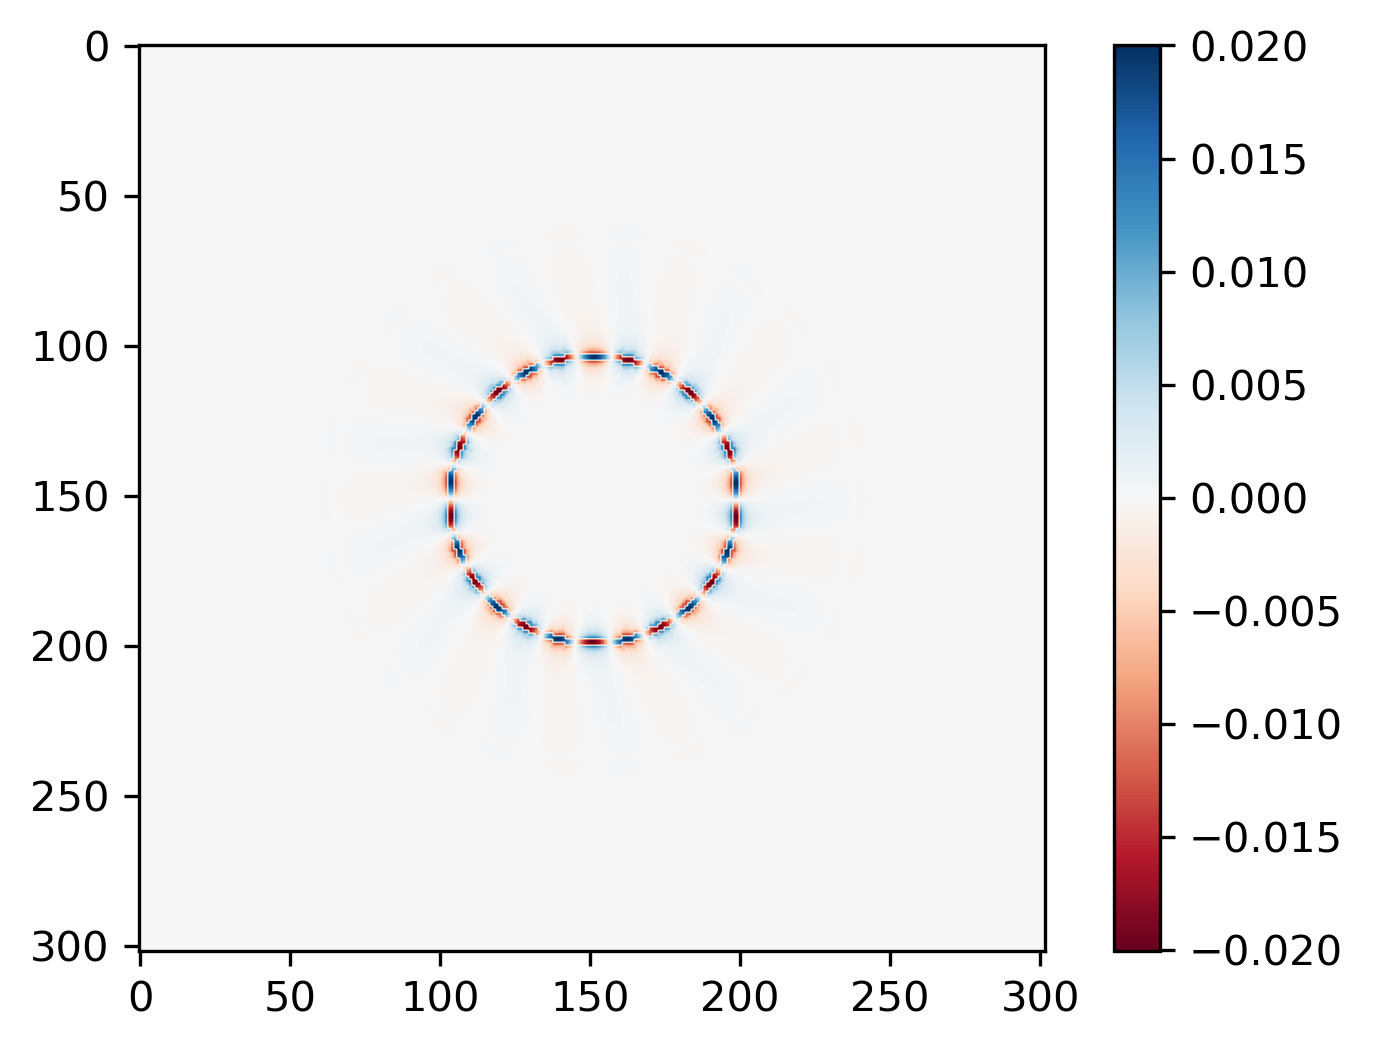

In [100]:
Er = sim.get_array(component=mp.Er, vol=mp.Volume(center=mp.Vector3(0.75,0,0), size=mp.Vector3(1.5,0,0)))

x = range(-len(Er),len(Er))
y = range(-len(Er),len(Er))
xx, yy = np.meshgrid(x, y)

# Magnitude
ind = np.sqrt(xx ** 2 + yy ** 2).astype(int)
ind = np.where(ind >= len(Er), len(Er) - 1, ind)
field = Er[ind]

# Phase
xx, yy = (xx.astype(complex), yy.astype(complex))
phase = np.exp(m * 1j * np.angle(xx+1j*yy))
field *= phase
#xx, yy = np.meshgrid(x, y)
#xx = xx/len(Er)*sr
#yy = yy/len(Er)*sr
plt.figure(dpi=300)
plt.imshow(np.real(field),cmap='RdBu')
plt.colorbar()

plt.savefig('Er')


     block, center = (0.44,0,0)
          size (0.88,1e+20,0.15)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (5.76,5.76,5.76)


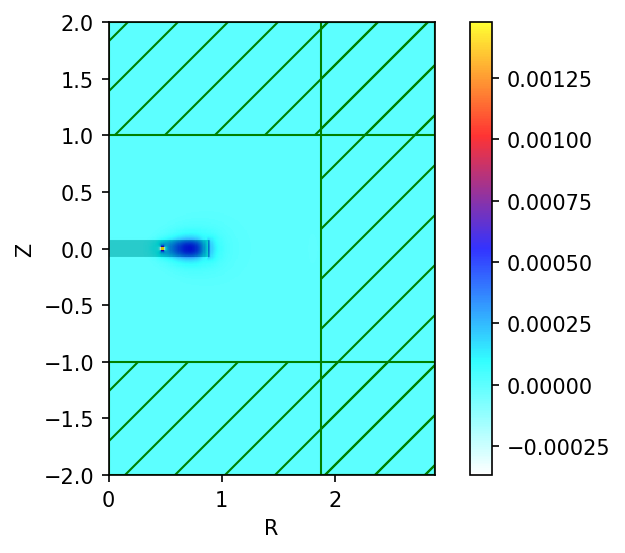

In [101]:
##
Er = sim.get_array(component=mp.Er, vol=mp.Volume(center=mp.Vector3(sr/2,0,0), size=mp.Vector3(sr,0,sz)))
##

nz = Er.shape[0]
nr = Er.shape[1]
zv = np.linspace(-sz/2,sz/2,nz)
rv = np.linspace(0,sr,nr)
rr, zz = np.meshgrid(rv, zv)
plt.figure(dpi=150)
plt.pcolormesh(rr,zz,np.real(Er), cmap=mycmap2,alpha= 0.8)
plt.colorbar()
sim.plot2D(eps_parameters={'contour':False},source_parameters={'alpha':0,'color':'white','linewidth':0.5})
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(0,sr)
plt.ylim(-sz/2,sz/2)

plt.show()